## Evaluate Performance for 1D bosonic RNN with and without $S_z^{tot}=0$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.colors as colors
import matplotlib.cm as cmx

params = {
    "text.usetex": True,
    "font.family": "serif",
    "legend.fontsize": 14,
    "figure.figsize": (6, 4),
    "axes.labelsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "lines.linewidth": 2,
    "lines.markeredgewidth": 0.8,
    "lines.markersize": 5,
    "lines.marker": "o",
    "patch.edgecolor": "black",
}
plt.rcParams.update(params)
plt.style.use("seaborn-deep")

print(os.environ["PATH"])
os.environ["PATH"] += os.pathsep + '/opt/local/bin'
print(os.getenv("PATH"))

cm = plt.get_cmap('tab10') 
values = range(8)
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
sm = cmx.ScalarMappable(norm=cNorm, cmap=cm)



def load(fol, folders, target=True):
    if target:
        # load target observables
        target_obs = {}
        for obs in ["sxsx", "sysy", "szsz"]:
            target_obs[obs] = []
            for folder in folders:
                value = np.real(np.load(fol+folder+"target_"+obs+".npy",allow_pickle=True))
                target_obs[obs].append(value)
    else: target_obs = None

    # load observables from RNN reconstruction
    rnn_obs = {}
    for obs in ["sxsx", "sysy", "szsz"]:
        rnn_obs[obs] = []
        for folder in folders:
            values = np.array(np.load(fol+folder+obs+".npy",allow_pickle=True))
            new_values = np.zeros((len(values[0][0]), len(values[0])))
            for v1 in range(len(values[0])):
                for v2 in range(len(values[0][v1])):
                    new_values[v2,v1] = values[0][v1][v2]
            rnn_obs[obs].append(new_values)
    return target_obs, rnn_obs

def plot(folders, rnn_obs, target_obs):
    # plot
    fig, ax = plt.subplots(1,3, figsize=(13,4), sharey=True, sharex=True)
    for o, obs in enumerate(["sxsx", "sysy", "szsz"]):
        for f, folder in enumerate(folders):
            for r, row in enumerate(target_obs[obs][f][0]):
                ax[o].plot(row, color = sm.to_rgba(f))
                ax[o].plot(rnn_obs[obs][f][r] , color = sm.to_rgba(f), linestyle="dotted", marker="x", markersize=10)
            label = folder[:6]+", "+folder[6:12]+", "+folder[12:17]
            ax[o].plot([],[], color = sm.to_rgba(f), label = label)
        ax[o].legend(title=obs, title_fontsize=16)
    plt.show()

/Users/hannah.lange/opt/anaconda3/bin:/Users/hannah.lange/opt/anaconda3/condabin:/opt/local/bin:/opt/local/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/usr/local/munki
/Users/hannah.lange/opt/anaconda3/bin:/Users/hannah.lange/opt/anaconda3/condabin:/opt/local/bin:/opt/local/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/usr/local/munki:/opt/local/bin


## half filling, different system sizes

In [2]:
f = "2x2_qubits/open/"
folders = ["Jp=0.0Jz=1.0t=0.0den=1.00/", "Jp=1.0Jz=0.0t=0.0den=1.00/", "Jp=1.0Jz=1.0t=0.0den=1.00/"]
target, rnn = load(f,folders)

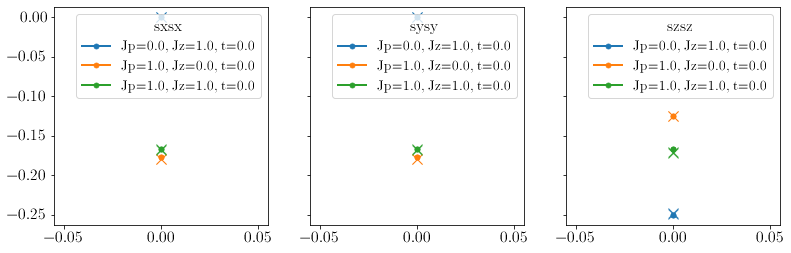

In [3]:
plot(folders, rnn, target)


In [4]:
for folder in folders:
    print(folder)
    eloc = np.load(f+folder+"/Eloc.npy")
    print("RNN energy: "+str(eloc))
    e = np.load(f+folder+"/E.npy")
    print("DMRG energy: "+str(e))
    print("relative error: "+str(np.abs(eloc-e)/np.abs(e)))
    N = np.load(f+folder+"/N.npy")
    print("N = "+str(N))
    print("--------------")

Jp=0.0Jz=1.0t=0.0den=1.00/
RNN energy: (-2+0j)
DMRG energy: (-2.0000000000000004+2.1009955321764115e-17j)
relative error: 2.2229296239865274e-16
N = 4.0
--------------
Jp=1.0Jz=0.0t=0.0den=1.00/
RNN energy: (-1.4142736+6.960824e-05j)
DMRG energy: (-1.414213562373095+1.3972961451864365e-17j)
relative error: 6.500840002058783e-05
N = 4.0
--------------
Jp=1.0Jz=1.0t=0.0den=1.00/
RNN energy: (-2.9783683-0.0009214467j)
DMRG energy: (-3.0000000000000004+2.627429900437135e-17j)
relative error: 0.0072171114098125945
N = 4.0
--------------


In [25]:
f = "3x3_qubits/open/"
folders = ["Jp=1.0Jz=0.0t=0.0den=1.00/", "Jp=1.0Jz=1.0t=0.0den=1.00/"]
target, rnn = load(f,folders)

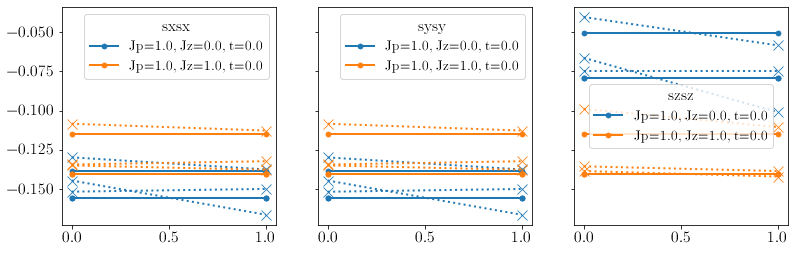

Jp=1.0Jz=0.0t=0.0den=1.00/
RNN energy: (-3.589716-0.006003275j)
DMRG energy: (-3.5937430434874367+1.6574954813417126e-17j)
relative error: 0.0020115188223392786
N = 9.0
--------------
Jp=1.0Jz=1.0t=0.0den=1.00/
RNN energy: (-4.744144+0.008391474j)
DMRG energy: (-4.749327258552872+1.322653304839308e-17j)
relative error: 0.0020767645698347302
N = 9.0
--------------


In [26]:
plot(folders, rnn, target)
for folder in folders:
    print(folder)
    eloc = np.load(f+folder+"/Eloc.npy")
    print("RNN energy: "+str(eloc))
    e = np.load(f+folder+"/E.npy")
    print("DMRG energy: "+str(e))
    print("relative error: "+str(np.abs(eloc-e)/np.abs(e)))
    N = np.load(f+folder+"/N.npy")
    print("N = "+str(N))
    print("--------------")

In [29]:
f = "4x4_qubits/open/"
folders = ["Jp=1.0Jz=0.0t=0.0den=1.00/"]
target, rnn = load(f,folders)

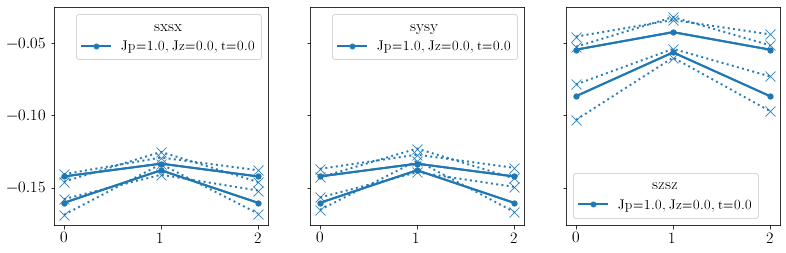

Jp=1.0Jz=0.0t=0.0den=1.00/
RNN energy: (-6.888432+0.05913344j)
DMRG energy: (-7.0093682450959225-2.686930140879783e-18j)
relative error: 0.01920561306323721
N = 15.995
--------------


In [30]:
plot(folders, rnn, target)
for folder in folders:
    print(folder)
    eloc = np.load(f+folder+"/Eloc.npy")
    print("RNN energy: "+str(eloc))
    e = np.load(f+folder+"/E.npy")
    print("DMRG energy: "+str(e))
    print("relative error: "+str(np.abs(eloc-e)/np.abs(e)))
    N = np.load(f+folder+"/N.npy")
    print("N = "+str(N))
    print("--------------")

## 3x3, t-Jz model

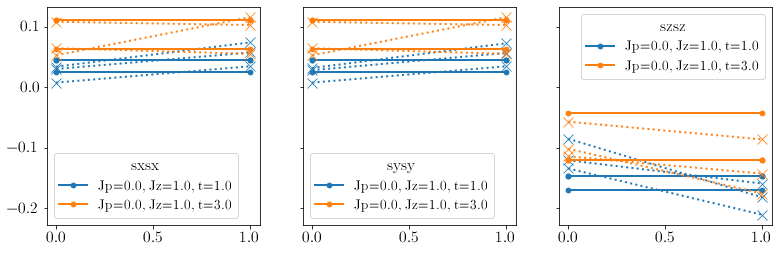

In [9]:
f = "3x3_qubits/open/"
folders = ["Jp=0.0Jz=1.0t=1.0den=0.89/", "Jp=0.0Jz=1.0t=3.0den=0.89/"]
target, rnn = load(f,folders)

plot(folders, rnn, target)

In [10]:
for folder in folders:
    print(folder)
    eloc = np.load(f+folder+"/Eloc.npy")
    print("RNN energy: "+str(eloc))
    e = np.load(f+folder+"/E.npy")
    print("DMRG energy: "+str(e))
    print("relative error: "+str(np.abs(eloc-e)/np.abs(e)))
    N = np.load(f+folder+"/N.npy")
    print("N = "+str(N))
    print("--------------")

Jp=0.0Jz=1.0t=1.0den=0.89/
RNN energy: (-6.127222+9.436734e-14j)
DMRG energy: (-6.4096090124426075+5.9252379289866245e-34j)
relative error: 0.04405681387697741
N = 7.9975
--------------
Jp=0.0Jz=1.0t=3.0den=0.89/
RNN energy: (-10.920844-6.096404e-07j)
DMRG energy: (-11.578309376730715+2.8116183430501446e-17j)
relative error: 0.05678422274571114
N = 8.0
--------------


## Comparison to Annabelles ED, 4x4, one hole, t=0

In [40]:
def plot(folders, rnn_obs):
    # plot
    fig, ax = plt.subplots(1,3, figsize=(13,4), sharey=True, sharex=True)
    for o, obs in enumerate(["sxsx", "sysy", "szsz"]):
        for f, folder in enumerate(folders):
            for r, row in enumerate([0,1,2]):
                ax[o].plot(rnn_obs[obs][f][r] , color = sm.to_rgba(f), linestyle="dotted", marker="x", markersize=10)
            label = folder[:-20]+", "+folder[-20:-14]+", "+folder[-14:-9]+", $\delta$="+folder[-5:-1]
            ax[o].plot([],[], color = sm.to_rgba(f), label = label)
        ax[o].legend(title=obs, title_fontsize=16)
    plt.show()

f = "4x4_qubits/periodic/"
folders = ["Jp=0.5Jz=1.0t=0.0den=0.94/", "Jp=0.75Jz=1.0t=0.0den=0.94/"]
target, rnn = load(f,folders, False)

Jp=0.5Jz=1.0t=0.0den=0.94/
ED energy: -7.6408
RNN energy: (-7.381564+0.04895027j)
relative error: 0.03452739319696055
N = 15.57
--------------
Jp=0.75Jz=1.0t=0.0den=0.94/
ED energy: -8.4933
RNN energy: (-7.26574-0.0371658j)
relative error: 0.14459898650599737
N = 15.26
--------------


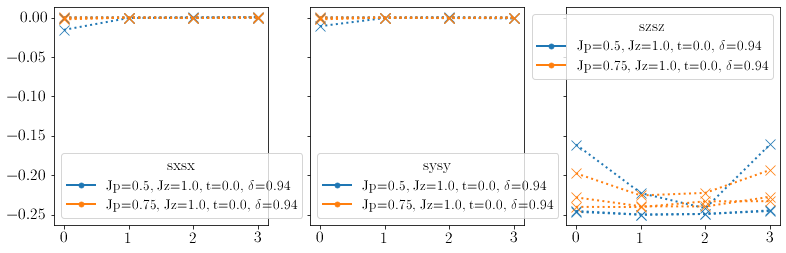

In [41]:
annabelles_data = {"Jp=0.5Jz=1.0t=0.0den=0.94/": -7.6408, "Jp=0.75Jz=1.0t=0.0den=0.94/":-8.4933}
for folder in folders:
    print(folder)
    e = annabelles_data[folder]
    print("ED energy: "+str(e))
    eloc = np.load(f+folder+"/Eloc.npy")
    print("RNN energy: "+str(eloc))
    print("relative error: "+str(np.abs(eloc-e)/np.abs(e)))
    N = np.load(f+folder+"/N.npy")
    print("N = "+str(N))
    print("--------------")
plot(folders, rnn)

In [13]:
"""
from model import Model

for folder in folders:
    model = Model(input_size=3, system_size_x=4,system_size_y=4, hidden_dim=8, n_layers=1, device = device)
    model = model.to(device)
    model = model.double()
    if os.path.exists(f+folder+"model_params.pt"):
        model.load_state_dict(torch.load(f+folder+"model_params.pt")) 
    snapshots = model.sample(10)
    print(snapshots)
    print("---------")
"""

'\nfrom model import Model\n\nfor folder in folders:\n    model = Model(input_size=3, system_size_x=4,system_size_y=4, hidden_dim=8, n_layers=1, device = device)\n    model = model.to(device)\n    model = model.double()\n    if os.path.exists(f+folder+"model_params.pt"):\n        model.load_state_dict(torch.load(f+folder+"model_params.pt")) \n    snapshots = model.sample(10)\n    print(snapshots)\n    print("---------")\n'